# Census Income Data Set

## **Table of Content**


### **1. Introduction**
     1.1 Data Description
     1.2 Features Description
     1.3 Objective of this project
  

### **2. Fetching Data**
    2.1 Import packages
    2.2 Import data


### **3. Data Cleaning**

### **4. Summary**
    4.1 Summary statistics for numeric attribute
    4.2 Summary and count for categorical attribute

### **5. EDA**
#### 5.1.Univariate analysis
    histograms and count plots for all single variables
#### 5.2.Bivariate analysis
    relationship with income for all variables            
#### 5.3.Multivariate analysis
    5.3.1 Correlation among the numeric variables.
    5.3.2 Multivariate analysis between "income", "age", "gender"
    5.3.3 Multivariate Analysis between "income", "hours-per-week", "gender"
    5.3.4 Making new variable(capital_change)
   
### **6. Conclusion of Complete EDA**

# What is Census?


A census is the procedure of systematically acquiring and recording information about the members of a given population.
The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  The prediction task is to determine whether a person makes over $50K a year.

## Features Description

**1. Categorical Attributes**
 * **workclass**:  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * **occupation**:  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * **relationship**:  Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * ** race**:  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * **sex**:  Female, Male.
 * **native-country**:  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   

**2. Continuous Attributes**
 * **age**: continuous.
  -  Age of an individual  
 * **fnlwgt**: final weight, continuous. 
 * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.
 * **capital-gain**: continuous.
 * **capital-loss**: continuous.
 * **hours-per-week**: continuous.
  -  Individual's working hour per week   

# Goal of this Notebook :
1. We are going to find, How Each attribute is related to Income of people in dataset.
2. Finding strong and weak relationship between those attributes with income.


# Fetching Data:

## Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

##  Import data

In [2]:
data = pd.read_csv("adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [140]:
data.shape

(48842, 15)

# Data Cleaning

### Missing Values

Missing/Nan values are present as ? in dataset. Hence we fix this with most frequent element(mode) in the entire dataset. 
It generalizes well, as we will see with the accuracy of our classifiers

In [141]:
#list of columns having missing values
for column in data.columns:
    count = len(data[data[column] == '?'].value_counts())
    if count > 0:
        print(column, count)

workclass 2795
occupation 2805
native-country 856


In [142]:
frq_workclass = data['workclass'].value_counts().index[0] #gives most frequent workclass
frq_occupation = data['occupation'].value_counts().index[0] #gives most frequent occupation
fr_nat_country = data['native-country'].value_counts().index[0] #gives most frequent native country

#replacing with modes for all three attributes
data.loc[data['workclass']=='?', 'workclass'] = frq_workclass
data.loc[data['occupation']=='?', 'occupation'] = frq_occupation
data.loc[data['native-country']=='?', 'native-country'] = fr_nat_country

In [143]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


See the change....

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [145]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

if we see income column, it has datatype object (string values) having two values, It's easier to operate on numerical data so let's convert these object to numerical values of 0 and 1

In [146]:
data['income'] = data['income'].map({'<=50K':0, '>50K':1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


## Summary statistics for numeric attribute

We are dropping 'educational-num' as it is same as education column. Income is categorical value so, we are not including it

In [147]:
data.drop(["educational-num","income"], axis=1).describe(include=np.number)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

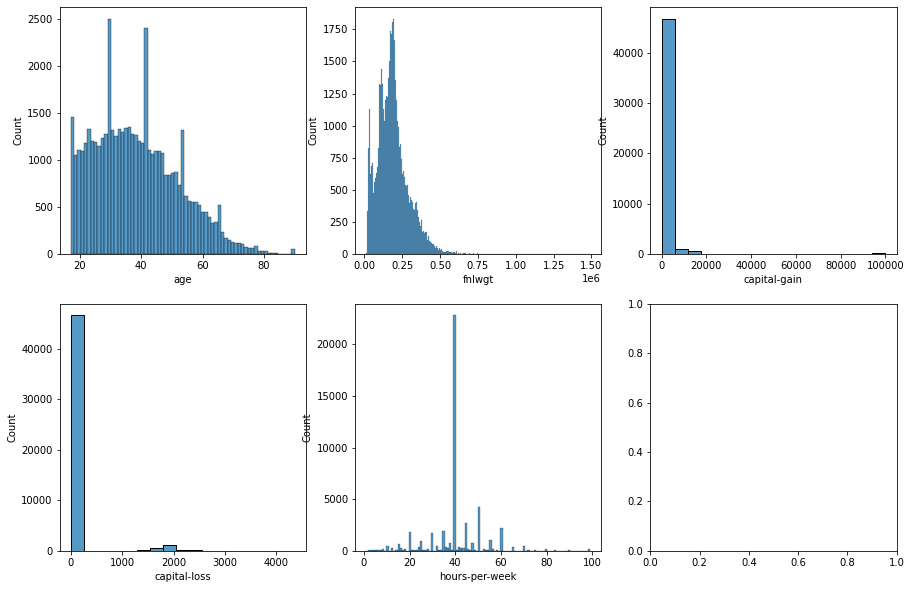

In [148]:
f, ax = plt.subplots(2, 3, figsize=(15,10))
sns.histplot(x="age", data=data, ax=ax[0][0])
sns.histplot(x="fnlwgt", data=data, ax=ax[0][1])
sns.histplot(x="capital-gain", data=data,ax=ax[0][2])
sns.histplot(x="capital-loss", data=data, ax=ax[1][0])
sns.histplot(x="hours-per-week", data=data, bins=100,ax=ax[1][1])

Summary of attributes explain following things:

**For Age :**
1.  The mean value is 38 i.e. on an average the value of age attribute is 38.
2.  Age is having the standerd deviation 13.71 which indicates the deviation of an observation from the mean.    
3.  The value of Age attribute varies from 17 to 90.
4.  The 1st quartile is 28 i.e. 25% of the observations lies below 28.
5.  3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
6.  The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
7.  The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.


**For fnlwgt :**
1.  This is the sampling weight corresponding to the observations.
2.  finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.


**For capital-gain :**
1.  For capital-gain, the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
2.  From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
3.  capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7452.01).
4.  capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).
 

**For capital-loss :**
1.  This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
2.  Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).


**For hours-per-week :**
1.  This attribute means number of working hours spend by an individual in a week.
2.  In this data the hours per week atrribute varies within the range of 1 to 99.
3.  75 percentage of the people spend 45 or less working hours per week.
4.  The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
5.  Observations are very sparse below 25th percentile and after 75th percentile.
6.  Using quartiles we can say that data is approximately symmetric.
4.  Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong.

## Summary and count for categorical attribute

In [149]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


* Native-country has maximum number of unique categories i.e. 41 categories.
* But the native-country is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).
* Occupation has  more or less uniform distribution of categories as comparerd to the other attributes.
* Race is also biased to the white race category(41762) with 85.5%.
* The top category in workclass is Private having frequency(36705) and percentage(75.5%).

#  EDA

## Univariate analysis

## 1. Age

### Distribution

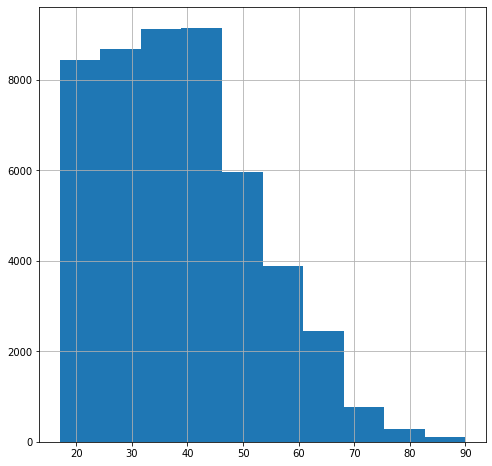

In [150]:
data['age'].hist(figsize=(8,8))
plt.show()

In [151]:
data[data["age"]>70].shape

(868, 15)

### Description about the distribution

The above histogram shows that :
* "age" attribute is not symmetric.
*  it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
*  Minimum and Maximum age of the people is 17 and 90 respectively.
*  This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

## Hours per week

### Distribution

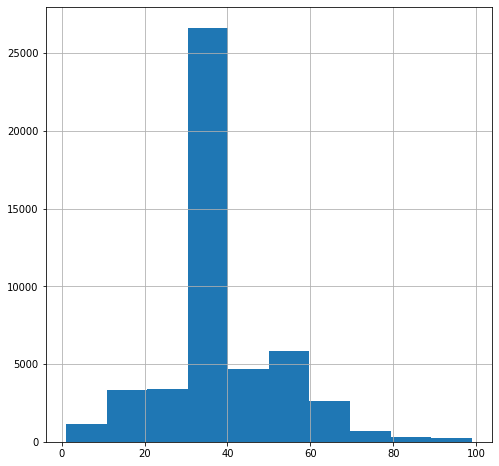

In [152]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

### Description about the distribution

This histogram of "hours-per-week" shows that:
* In this data the hours per week atrribute varies within the range of 1 to 99.
* Most people work 30-40 hours per week, they are roughly 27,000 people.
* There are also few people who works 80-100 hours per week and some less than 20 which is unusual. 
*  75 percentage of the people spend 45 or less working hours per week.

## fnlwgt

**fnlwght** variable may stand for a weight of an observation.

### Distribution

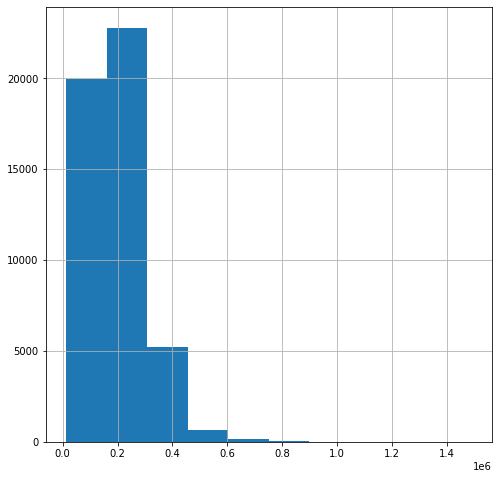

In [153]:
data['fnlwgt'].hist(figsize=(8,8))
plt.show()

### Description about the distribution

The above histogram shows that :
* This is the sampling weight corresponding to the observations.
* The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).

##  capital-gain

### Distribution

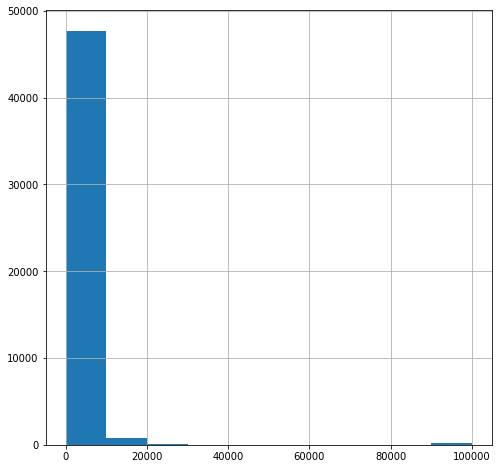

In [154]:
data["capital-gain"].hist(figsize=(8,8))
plt.show()

### Description about the distribution


* This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
*  capital-gain is concentrated on the one particular value and other are spread with  large standard deviation(7452.01).
*  capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

## capital-loss

### Distribution

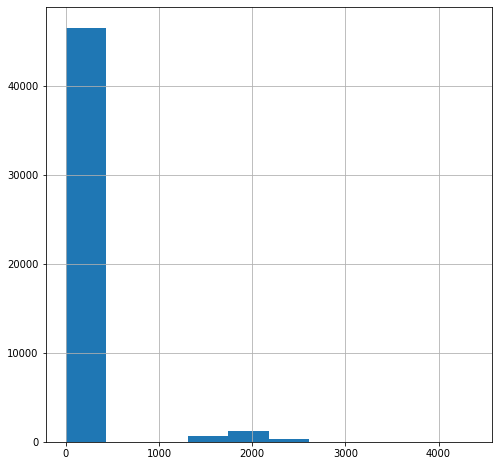

In [155]:
data["capital-loss"].hist(figsize=(8,8))
plt.show()

In [156]:
data[data["capital-loss"]>0].shape

(2282, 15)

### Description about the distribution

* This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282).
* This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)

### Relation between capital gain and capital loss

#### Let's explore more about capital loss and capital gain.

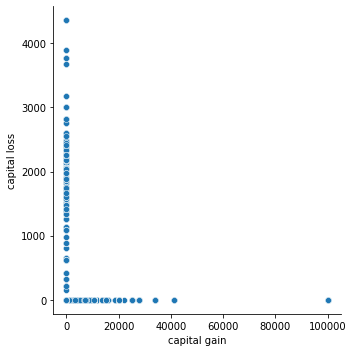

In [157]:
sns.relplot('capital-gain','capital-loss', data= data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Possibilities for capital gain and capital loss

*     Both capital gain and capital loss can be zero
*     If capital.gain is zero there is possibility of capital loss being high or above zero.
*     If capital loss is zero there is possibility of capital.gain being high or above zero.



**With the help of this, we can do one modification later(It could be combine these together i.e. capital-change = [capital-gain - capital-loss])**

##  Workclass

### Distribution

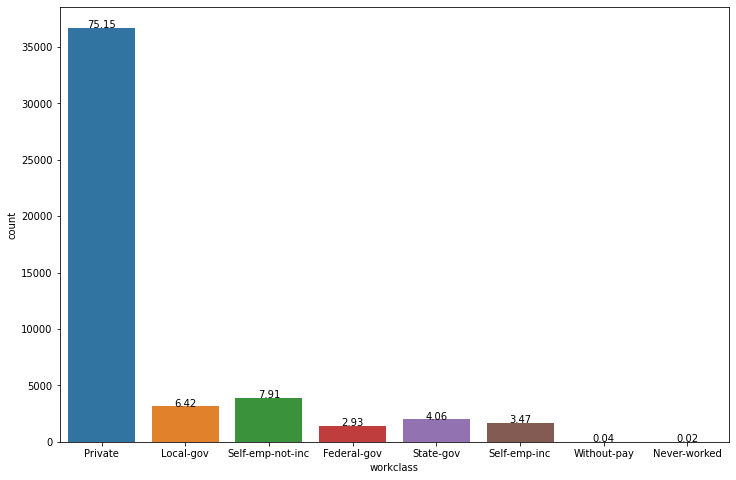

In [158]:
plt.figure(figsize=(12,8))

total = float(len(data["income"]) )
ax = sns.countplot(x="workclass", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description about the distribution

Summary  distribution shows that:
* There are 8 unique categories present in the worclass attribute.
* Most of them belong to the *private* workclass(36705) i.e. 75.15%.
* *without-pay* and *never-worked* has minimum count in workclass attribute(less than 1%).
* There is huge imbalance in the categories of workclass attribute.

## Education

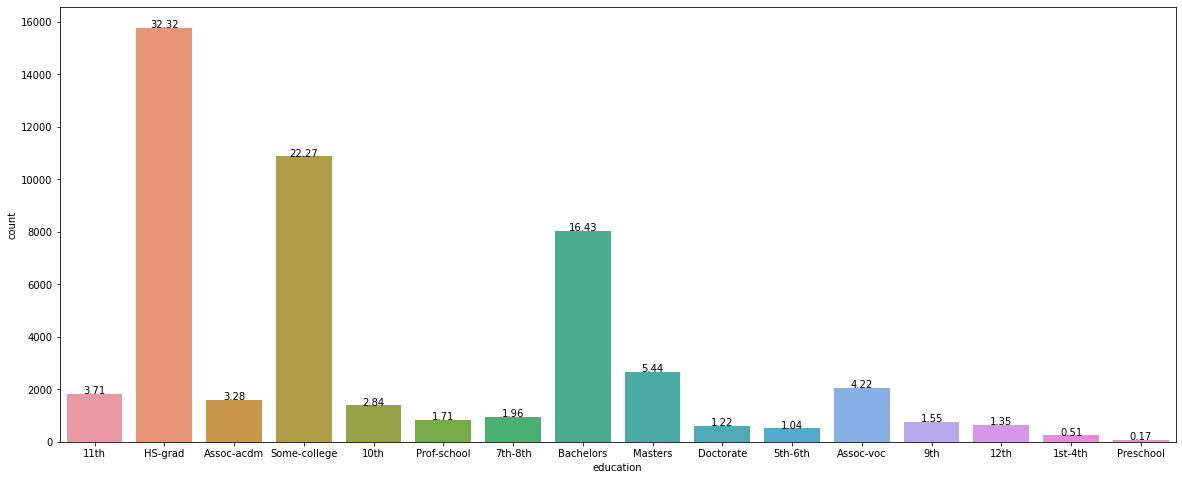

In [159]:
plt.figure(figsize=(20, 8))
total = len(data['education'])

ax = sns.countplot(x='education', data=data)
for patch in ax.patches:
    hght = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2, 
            hght+3, 
            "{:1.2f}".format((hght/total)*100), 
            ha='center')
plt.show()

### Description about the distribution


* There are 16 unique categories present in the **education** attribute.
* *Hs-grad* has 32.32% of all the education attribute.
* *HS-grad* (15784) has the maximum number of observations followed by *some-college*(10878) and *Bachelors*(8025).
* *Pre-school* has minimum samples i.e. 83.


## Marital-status

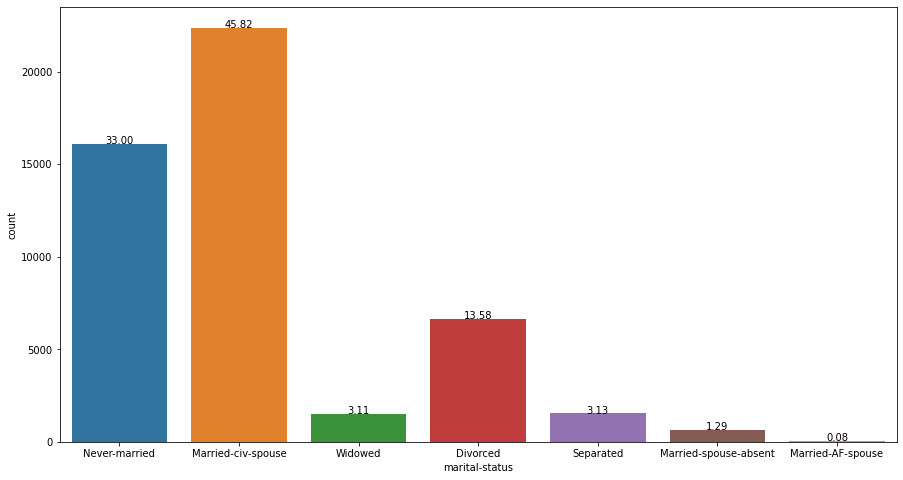

In [160]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description about the distribution


* This *marital-status* attribute has 7 unique categories.
* Two of them are dominate over other categories(these are *Never-married*(33%) and *married-civ-spouse*(45.82%).
* *Married-civ-spouse* has maximum number of samples.
* *Married-AF-spouse* has minimum number of obs.


## Occupation

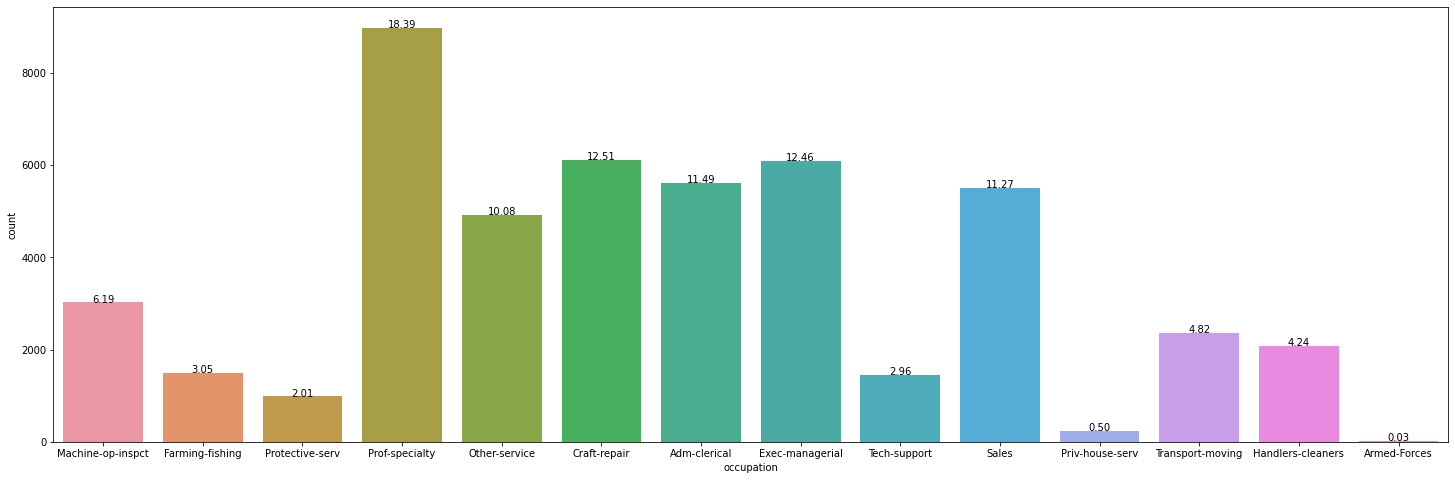

In [161]:
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description about the distribution


* There are 14 unique categories present in the **occupation** attribute.
* *Prof-specialty* has the maximum count(8981) but *Craft-repair*, *Exec-managerial* and *Adm-clerical Sales* has comparable number of observations.
* *Armed-Forces * has minimum samples in the **occupation** attribute.

## Relationship

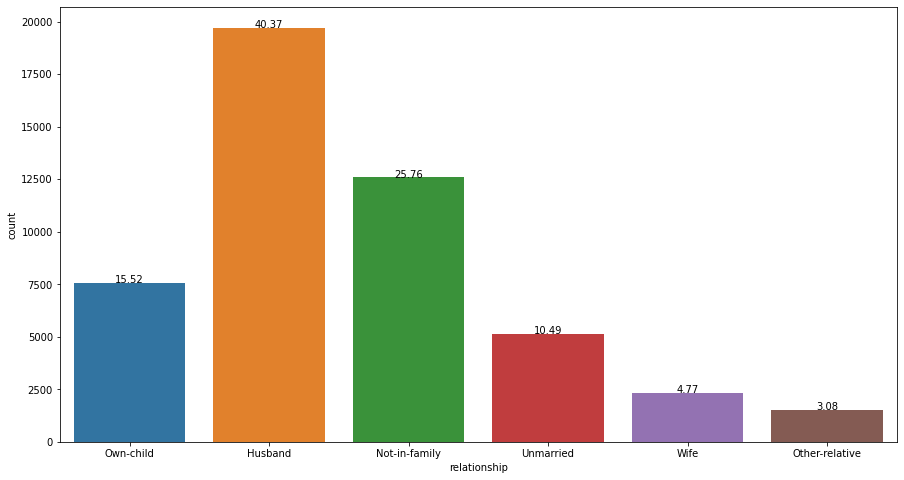

In [162]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description about the distribution


* There are 6 unique categories in the **relationship** attribute.
* *Husband* has maximum percentage (40.37%) among all categories followed by *not-in-family*(25.76%)

## Race

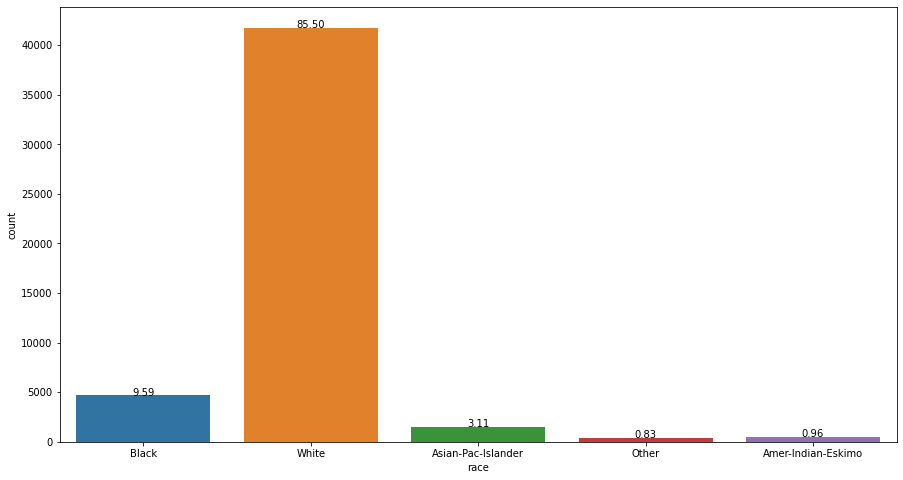

In [163]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description about the distribution

This distribution explains that:
* There are 5 unique categories in the **race** attribute.
* Most of them are "white" which is roughly 85.50%.
* This dataset is totally bias toward the "white" race.
* Second major race in the dataset is the "black" with just 9.59%.

##  Gender

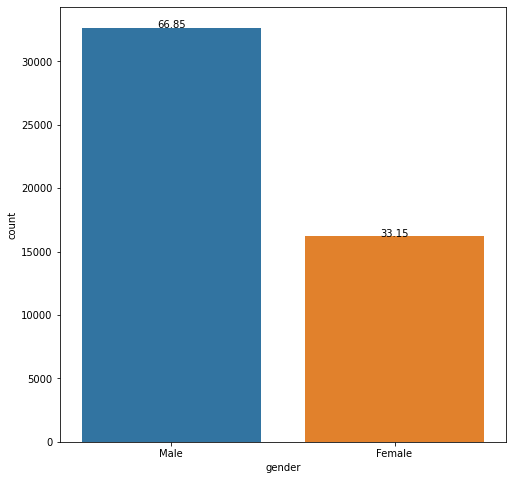

In [164]:
plt.figure(figsize=(8,8))
total = float(len(data) )

ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description about the distribution

This distribution explains that:
* Gender has 2 unique categories(male and female).
* But the frequency of *male*(32650) is higher than the *female*(16192) categories.
* Distribution shows that this dataset is skewed toward the male with nearly 67%.

## Native-country

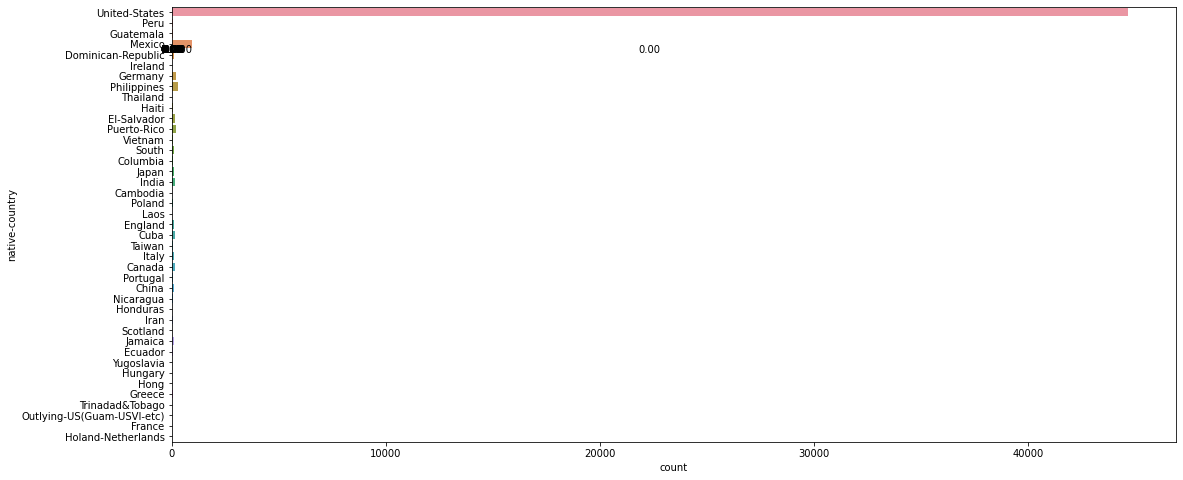

In [165]:
plt.figure(figsize=(18,8))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description From countplot

* This dataset is taken from the US.
* As 91.5% of them have native country America and others are immigrants.

##  Income(Target variable)

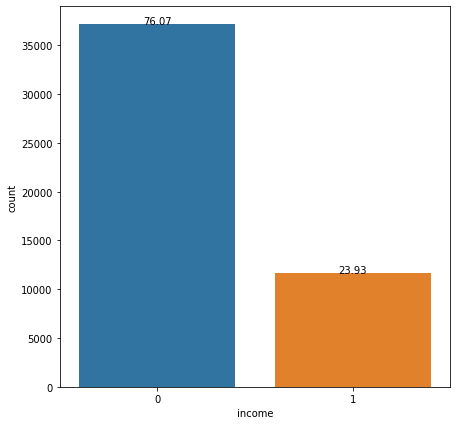

In [166]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description about the distribution

This distibution says that:
* **This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).**

# Bivariate analysis

##  Age

### i. **Boxplot (Relationship with income)**

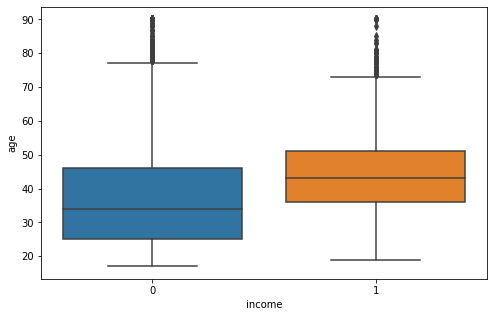

In [167]:
fig = plt.figure(figsize=(8, 5)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [168]:
data[data['income']==0]['age'].describe()

count    37155.000000
mean        36.872184
std         14.104118
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [169]:
data[data['income'] == 1]['age'].describe()

count    11687.000000
mean        44.275178
std         10.558983
min         19.000000
25%         36.000000
50%         43.000000
75%         51.000000
max         90.000000
Name: age, dtype: float64

 **The mean "age" for Income group(<=50k) is 36.8 years.
 And for Income group(>50k) is 44.2 years**

### ii. Description about boxplot

The above bivariate boxplot shows :
* Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
* Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
* Interquartile range(IQR) :
   *   For Income group(<=50k) , IQR is between [25,46] (long range)
> Middle 50% of the Age is spread over longer range for the income group who earn <=50k.   
   *   For Income group(>50k) , IQR is between [38,51] (shorter range)

### iii. Hypothesis test (to test the relationship between income & Age )

**Two sampled T-test** :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.



Determine a null and alternative hypothesis.

    In general, the null hypothesis will state that the two populations being tested have no statistically significant difference.
    The alternate hypothesis will state that there is one present.



In this example we can say that:
*  **Null Hypothesis** :- there is no difference in Mean age  of income group >50k and income group <=50k.
*  **Alternate Hypothesis** :- there is difference in Mean age of income group >50k and income group <=50k.


In [172]:
import numpy as np
import random

In [173]:
income_0 = data[data['income']==0]['age']
income_1 = data[data['income']==1]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, sample_size)

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, sample_size)

_, p_value = stats.ttest_ind(income_0, income_1, equal_var=False)
print(p_value)
if p_value <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

6.509752415237798e-48
we reject null hypothesis


### Conclusion
Using statistical analysis,

    We can conclude that there is a significant difference in the mean ages of income group >50k and income group <=50k.
    It means that age has some contribution to the distinguish income groups.

##  Hours per week

### i. Boxplot (Relationship with income)

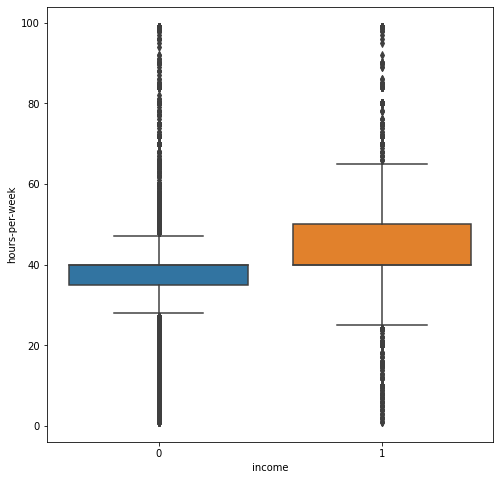

In [174]:
fig = plt.figure(figsize=(8, 8)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

In [175]:
data[data['income'] == 0]['hours-per-week'].describe()

count    37155.000000
mean        38.840048
std         12.356849
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [176]:
data[data['income'] == 1]['hours-per-week'].describe()

count    11687.000000
mean        45.452896
std         11.091176
min          1.000000
25%         40.000000
50%         40.000000
75%         50.000000
max         99.000000
Name: hours-per-week, dtype: float64

### ii. Description about boxplot

Bivariate Analysis with the boxplot shows that:
* The mean "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k. 
* Interpretation
    * Income group who earns >50k has spend ~45 "hours-per-week".(long hours)
    * Income group who earns <=50k has spend  ~38 "hours-per-week".
   
* The boxplot for Income group who earns <=50k has small range for minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)
*Interpretation
    *  Income group who earns >50k have flexible working hours
* More Outliers present in the Income group who earns <=50k.

### iii. Hypothesis test (to test the relationship between income & hours-per-week )

In this example we can say that:
*  **Null Hypothesis** :- there is no difference in Mean hours-per-week  of income group >50k and income group <=50k.
*  **Alternate Hypothesis** :- there is difference in Mean hours-per-week of income group >50k and income group <=50k.


In [178]:
income_0 = data[data['income']==0]['hours-per-week']
income_1 = data[data['income']==1]['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, sample_size)

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, sample_size)

_, p_value = stats.ttest_ind(income_0, income_1, equal_var=False)
print(p_value)
if p_value <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

1.035841711763476e-28
we reject null hypothesis


### Conclusion
Using statistical analysis,

    We can conclude that there is difference in Mean of income group >50k and income group <=50k.
    It means that hours-per-week has some contribution to the distinguish income groups.



##  fnlwgt

### i. Boxplot (Relationship with income)

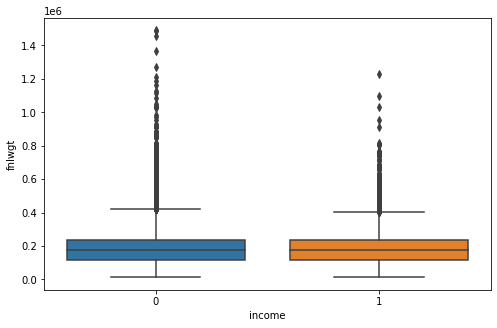

In [179]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.show()

In [180]:
data[data['income'] == 0]['fnlwgt'].describe()

count    3.715500e+04
mean     1.900396e+05
std      1.065776e+05
min      1.228500e+04
25%      1.172100e+05
50%      1.788110e+05
75%      2.389170e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [181]:
data[data['income'] == 1]['fnlwgt'].describe()

count    1.168700e+04
mean     1.884706e+05
std      1.024427e+05
min      1.376900e+04
25%      1.189425e+05
50%      1.767290e+05
75%      2.335050e+05
max      1.226583e+06
Name: fnlwgt, dtype: float64

In [182]:
data[data['income'] == 0]['fnlwgt'].median()

178811.0

### ii.  Description about boxplot

* As evident from the above plot, both income group has nearly same IQR and median is centered on 176729 and 178811
* Outliers are present in both the income groups.
* It seems that the boxplot for final weight w.r.t income groups is similar except the number of outliers in income group who earns <=50k is more.

###  Hypothesis test (to test the relationship between income & fnlwgt )

In this example we can say that:
*  **Null Hypothesis** :- there is no difference in Mean fnlwgt of income group >50k and income group <=50k.
*  **Alternate Hypothesis** :- there is difference in Mean fnlwgt of income group >50k and income group <=50k.


In [183]:
income_0 = data[data['income']==0]['fnlwgt']
income_1 = data[data['income']==1]['fnlwgt']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, sample_size)

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, sample_size)

_, p_value = stats.ttest_ind(income_0, income_1, equal_var=False)
print(p_value)
if p_value <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

0.6674204632600065
we accept null hypothesis


Using statistical analysis 

    We can conclude that there is no difference in Mean of income group >50k and income group <=50k.
    It means that final weight has no contribution to the distinguish income group.



## capital-gain

### i. Boxplot (Relationship with income)

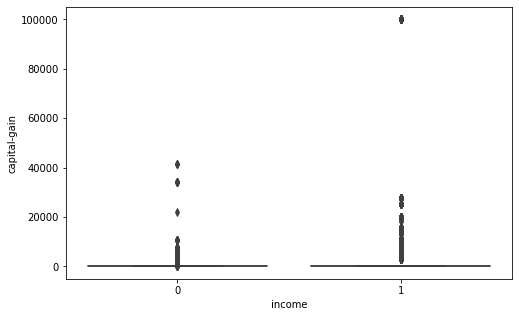

In [184]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="income", y="capital-gain", data=data)
plt.show()

In [185]:
data[data['income'] == 0]['capital-gain'].describe()

count    37155.000000
mean       147.010308
std        936.753678
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      41310.000000
Name: capital-gain, dtype: float64

In [186]:
data[data['income'] == 1]['capital-gain'].describe()

count    11687.000000
mean      4042.239497
std      14756.771034
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

 ### ii. Description about boxplot

This boxplot tells us that:

    Most of the capital gains value is accumulated at 0 for both the income group .
    The Dataset is highly difference between Mean 

### Hypothesis test (to test the relationship between income & capital-gain )

In this example we can say that:
*  **Null Hypothesis** :- there is no difference in Mean capital-gain of income group >50k and income group <=50k.
*  **Alternate Hypothesis** :- there is difference in Mean capital-gain of income group >50k and income group <=50k.


In [188]:
income_0 = data[data['income']==0]['capital-gain']
income_1 = data[data['income']==1]['capital-gain']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, sample_size)

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, sample_size)

_, p_value = stats.ttest_ind(income_0, income_1, equal_var=False)
print(p_value)
if p_value <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

1.5162017128342318e-15
we reject null hypothesis


### Conclusion
Using statistical analysis,

    We can conclude that there is a significant difference in the mean capital-gain of income group >50k and income group <=50k.
    It means that capital-gain has some contribution to the distinguish income groups.

## Capital-loss

### i. Boxplot (Relationship with income)

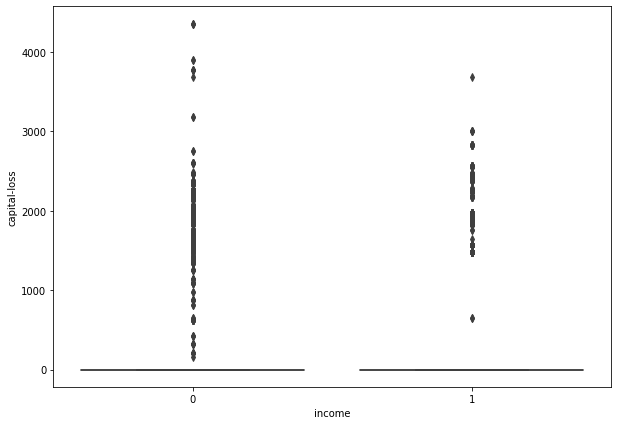

In [189]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()

In [190]:
data[data['income'] == 0]['capital-loss'].describe()

count    37155.000000
mean        54.151931
std        313.320005
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [191]:
data[data['income'] == 1]['capital-loss'].describe()

count    11687.000000
mean       193.528964
std        593.211612
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3683.000000
Name: capital-loss, dtype: float64

### ii. Description about boxplot

This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.

### Hypothesis test (to test the relationship between income & Capital Loss )

In this example we can say that:
*  **Null Hypothesis** :- there is no difference in Mean capital-loss  of income group >50k and income group <=50k.
*  **Alternate Hypothesis** :- there is difference in Mean capital-loss of income group >50k and income group <=50k.


In [192]:
income_0 = data[data['income']==0]['capital-loss']
income_1 = data[data['income']==1]['capital-loss']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, sample_size)

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, sample_size)

_, p_value = stats.ttest_ind(income_0, income_1, equal_var=False)
print(p_value)
if p_value <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

9.625632896011494e-12
we reject null hypothesis


### Conclusion
Using statistical analysis,

    We can conclude that there is a significant difference in the mean capital loss of income group >50k and income group <=50k.
    It means that capital loss has some contribution to the distinguish income groups.

##  Workclass

### i. Plot (Relationship with income)

posx and posy should be finite values
posx and posy should be finite values


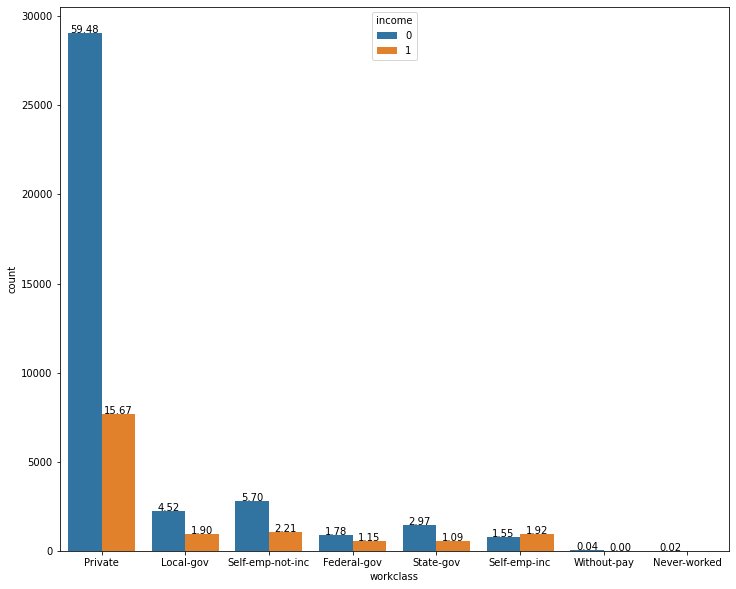

In [193]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This plot shows that:

*     In private workclass most of the people(59.48%) earn <=50k(belong to income group 0).
*     self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
*     In Federal-gov workclass nearly more than half of the people earn >50k.

### Hypothesis test (to test the relationship between Income & Workclass )

### Chi-square goodness of fit

A chi-square goodness of fit test allows us to test whether the observed proportions for a categorical variable differ from hypothesized proportions. The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution.
* For example, let’s suppose that we believe that the general population consists of 70% private workclass, 10% local-gov, 10% self-emp-not-inc and 10% self-emp-inc. We want to test whether the observed proportions from our sample differ significantly from these hypothesized proportions. 

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between workclass and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between workclass and income.

In [196]:
# contingency table
c_t = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, random_state=1),
                  data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
print(c_t)
print('----------')
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

if p <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

income             0   1
workclass               
Federal-gov        2   1
Local-gov          6   1
Private           54  21
Self-emp-inc       2   1
Self-emp-not-inc   4   3
State-gov          3   0
----------
dof=5
p_value 0.7480097177562304
[[ 2.17346939  0.82653061]
 [ 5.07142857  1.92857143]
 [54.33673469 20.66326531]
 [ 2.17346939  0.82653061]
 [ 5.07142857  1.92857143]
 [ 2.17346939  0.82653061]]
probability=0.950, critical=11.070, stat=2.688
Independent (fail to reject H0)
we accept null hypothesis


### Conclusion
With the help of Chi-Squared test,

    As we have accept the H0, that there is no relationship between these two categorical variable.
    We can conclude that is no dependency of "Workclass" attribute on the target variable "income"

## Education

### i. Plot (Relationship with income)

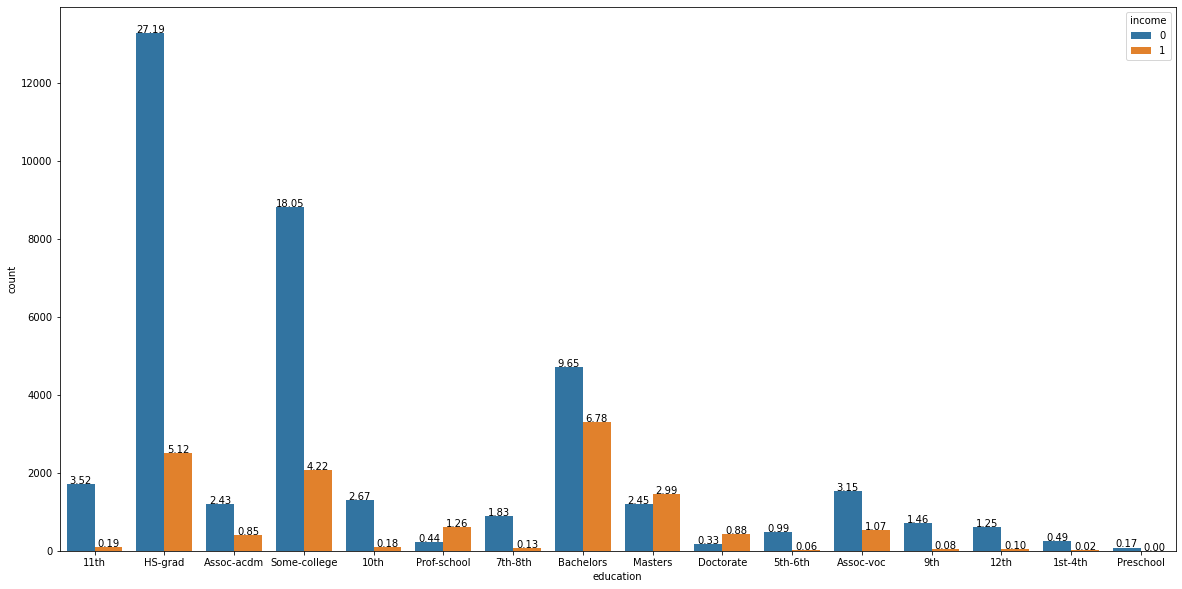

In [197]:
plt.figure(figsize=(20,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This plot shows that:

*     Despite the fact that most of the categories fall under the HS-grad but the interesting thing is only 5.12% of all people belong to the income group 1(i.e. earns more than 50k), surprisely less than the categories fall under the Bachelors which is 6.78%.
*     There only few categories in "education" attribute whose percentage to fall under income group 1 is greater than the falling under income group 0.
*     These are prof-school, masters and doctorate.
*     We can also infer that higher eduction may provide better earnings.

### Hypothesis test (to test the relationship between Income & Education )

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between Education and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between Education and income.

In [198]:
# contingency table
c_t = pd.crosstab(data['education'].sample(frac=0.002, replace=True, random_state=1),
                  data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
print(c_t)
print('----------')
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

if p <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

income         0  1
education          
10th           3  0
11th           7  0
12th           1  0
9th            1  0
Assoc-acdm     4  1
Assoc-voc      4  4
Bachelors      9  7
Doctorate      0  2
HS-grad       27  6
Masters        2  4
Some-college  13  3
----------
dof=10
p_value 0.022830136196534293
[[ 2.17346939  0.82653061]
 [ 5.07142857  1.92857143]
 [ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [ 3.62244898  1.37755102]
 [ 5.79591837  2.20408163]
 [11.59183673  4.40816327]
 [ 1.44897959  0.55102041]
 [23.90816327  9.09183673]
 [ 4.34693878  1.65306122]
 [11.59183673  4.40816327]]
probability=0.950, critical=18.307, stat=20.760
Dependent (reject H0)
we reject null hypothesis


### Conclusion
With the help of Chi-Squared test,

    As we have Reject the H0, that there is relationship between these two categorical variable.
    We can conclude that is dependency of "Education" attribute on the target variable "income"

##  Marital-status

### i. Plot (Relationship with income)

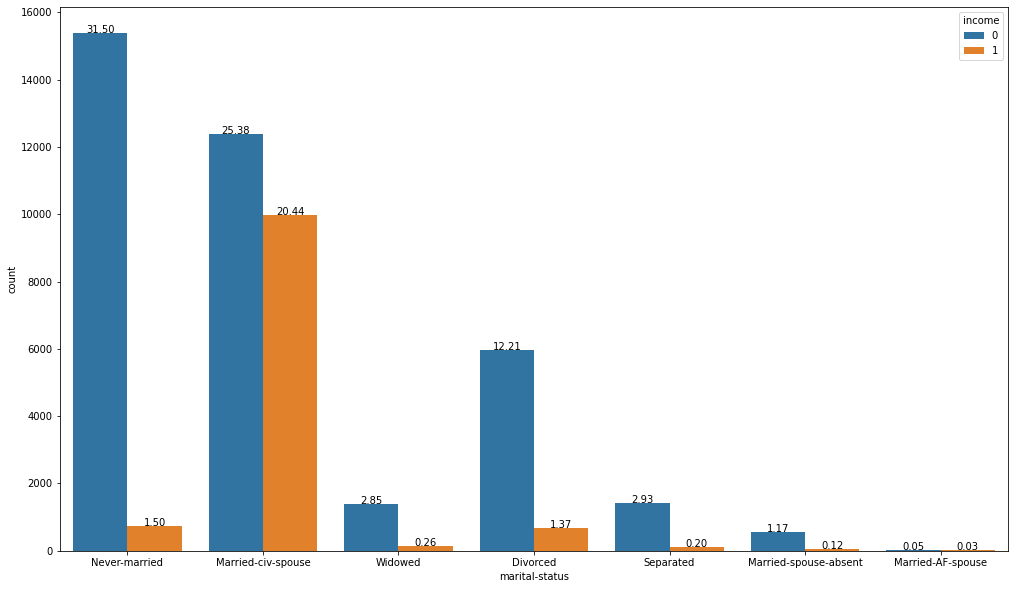

In [199]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="marital-status", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     Married-civ-spouse has the highest percentage(20.44%) of falling under the income group 1(>50k).
*     Despite the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the people of "Never-married" earn more than 50k.
*     Married-spouse-absent and Married-AF-spouse has negligible contribution to the fall under income group 1.

### Hypothesis test (to test the relationship between Income & Marital-status )

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between Marital-status and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between Marital-status and income.

In [200]:
# contingency table
c_t = pd.crosstab(data['marital-status'].sample(frac=0.002, replace=True, random_state=1),
                  data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
print(c_t)
print('----------')
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

if p <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

income               0   1
marital-status            
Divorced             6   0
Married-civ-spouse  28  23
Never-married       31   3
Separated            1   1
Widowed              5   0
----------
dof=4
p_value 0.0009723128666570135
[[ 4.34693878  1.65306122]
 [36.94897959 14.05102041]
 [24.63265306  9.36734694]
 [ 1.44897959  0.55102041]
 [ 3.62244898  1.37755102]]
probability=0.950, critical=9.488, stat=18.529
Dependent (reject H0)
we reject null hypothesis


### Conclusion
With the help of Chi-Squared test,

    As we have Reject the H0, that there is relationship between these two categorical variable.
    We can conclude that is dependency of "marital-status" attribute on the target variable "income"

## Occupation

### i. Plot (Relationship with income)

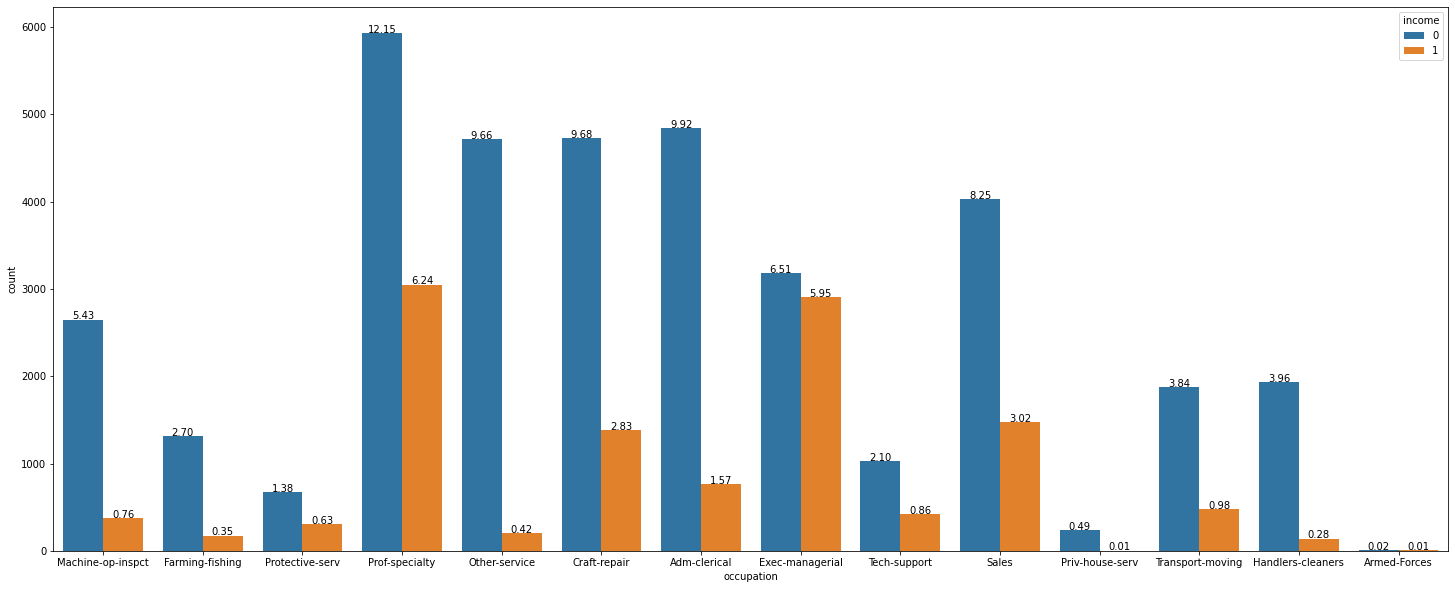

In [201]:
plt.figure(figsize=(25,10))
total = float(len(data) )

ax = sns.countplot(x="occupation", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     Prof-specialty has maximum percentage that fall in both income group 0 and 1 in whole categories with 12.15% and 6.24% respectively.
*     There is an interesting thing to look in this plot which is no occupation has greater percentage of falling in income group 1 than the income group 0. i.e. in every occupation, people who earn less than 50k is greater than people who earn >50k.

### Hypothesis test (to test the relationship between Income & Occupation )

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between occupation and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between occupation and income.

In [203]:
# contingency table
c_t = pd.crosstab(data['occupation'].sample(frac=0.002, replace=True, random_state=1),
                  data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
print(c_t)
print('----------')
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

if p <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

income              0  1
occupation              
Adm-clerical        9  3
Craft-repair        9  2
Exec-managerial     6  7
Farming-fishing     1  0
Handlers-cleaners   5  0
Machine-op-inspct   4  1
Other-service       8  0
Prof-specialty     10  7
Protective-serv     2  0
Sales              11  5
Tech-support        1  1
Transport-moving    5  1
----------
dof=11
p_value 0.2439510044098239
[[ 8.69387755  3.30612245]
 [ 7.96938776  3.03061224]
 [ 9.41836735  3.58163265]
 [ 0.7244898   0.2755102 ]
 [ 3.62244898  1.37755102]
 [ 3.62244898  1.37755102]
 [ 5.79591837  2.20408163]
 [12.31632653  4.68367347]
 [ 1.44897959  0.55102041]
 [11.59183673  4.40816327]
 [ 1.44897959  0.55102041]
 [ 4.34693878  1.65306122]]
probability=0.950, critical=19.675, stat=13.805
Independent (fail to reject H0)
we accept null hypothesis


### Conclusion
With the help of Chi-Squared test,

    As we have accept the H0, that there is no relationship between these two categorical variable.
    We can conclude that is no dependency of "Workclass" attribute on the target variable "income"

##  Relationship

### i. Plot (Relationship with income)

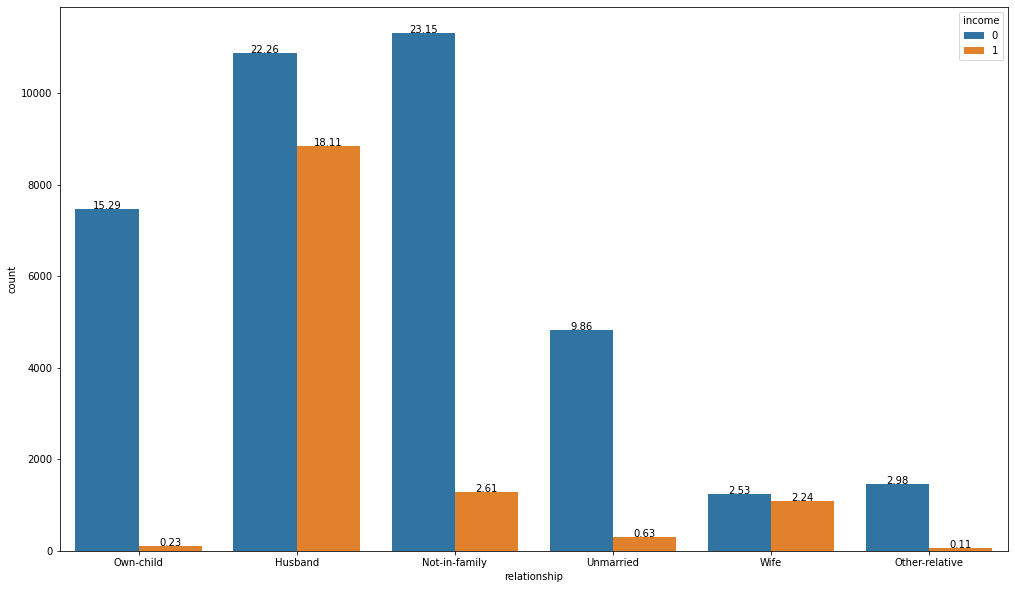

In [204]:
plt.figure(figsize=(17,10))
total = float(len(data))

ax = sns.countplot(x="relationship", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     husbands has the highest percentage(18.11%) of earning more than 50k in all the other categories.
*     One thing to notice is that "not-in-family" has highest percentage(23.15%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.24%) category. This comparsion is done due to fact that "wife" category has only 2.53% to fall under the income group 0.
*     "own-child" and "other-relative" has the minimum percentage to fall under the income group 1 i.e. 0.23% and 0.11% respectively.
*     There is huge difference between the percentage of fall either groups except for "husband" and "wife".

### Hypothesis test (to test the relationship between Income & Relationship ) 

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between relationship and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between relationship and income.

In [205]:
# contingency table
c_t = pd.crosstab(data['relationship'].sample(frac=0.002, replace=True, random_state=1),
                  data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
print(c_t)
print('----------')
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

if p <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

income           0   1
relationship          
Husband         25  19
Not-in-family   18   3
Other-relative   2   0
Own-child       14   0
Unmarried       10   1
Wife             2   4
----------
dof=5
p_value 0.0013631817394203864
[[31.87755102 12.12244898]
 [15.21428571  5.78571429]
 [ 1.44897959  0.55102041]
 [10.14285714  3.85714286]
 [ 7.96938776  3.03061224]
 [ 4.34693878  1.65306122]]
probability=0.950, critical=11.070, stat=19.799
Dependent (reject H0)
we reject null hypothesis


### Conclusion
With the help of Chi-Squared test,

    As we have reject the H0, that there is relationship between these two categorical variable.
    We can conclude that is dependency of "relationship" attribute on the target variable "income"

##  Race

### i.  Plot (Relationship with income)

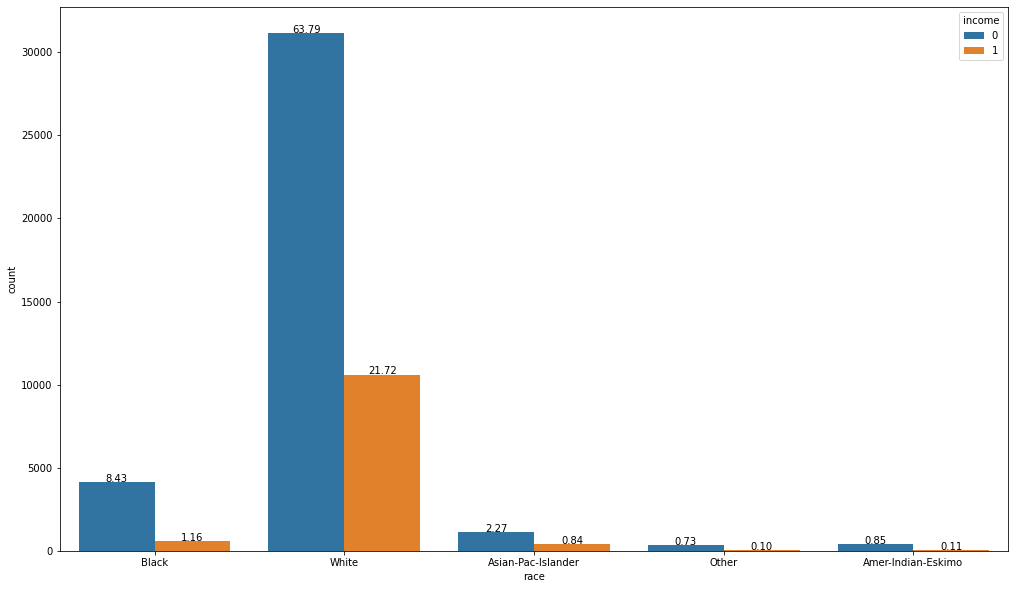

In [206]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="race", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     The relationship of "white" race with "income" can easily guess based on previous summary statistics.
*     There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.63%) and "amer-indian-eskimo"(.74%) but this could be due the lesser number of observations for those categories.

### Hypothesis test (to test the relationship between Income & Race  ) race 

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between race and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between race and income.

In [207]:
# contingency table
c_t = pd.crosstab(data['race'].sample(frac=0.002, replace=True, random_state=1),
                  data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
print(c_t)
print('----------')
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

if p <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

income               0   1
race                      
Asian-Pac-Islander   5   0
Black                6   1
Other                1   0
White               59  26
----------
dof=3
p_value 0.3488098500127964
[[ 3.62244898  1.37755102]
 [ 5.07142857  1.92857143]
 [ 0.7244898   0.2755102 ]
 [61.58163265 23.41836735]]
probability=0.950, critical=7.815, stat=3.292
Independent (fail to reject H0)
we accept null hypothesis


### Conclusion
With the help of Chi-Squared test,

    As we have accept the H0, that there is no relationship between these two categorical variable.
    We can conclude that is no dependency of "race" attribute on the target variable "income"

##  Gender

### i. Plot (Relationship with income)

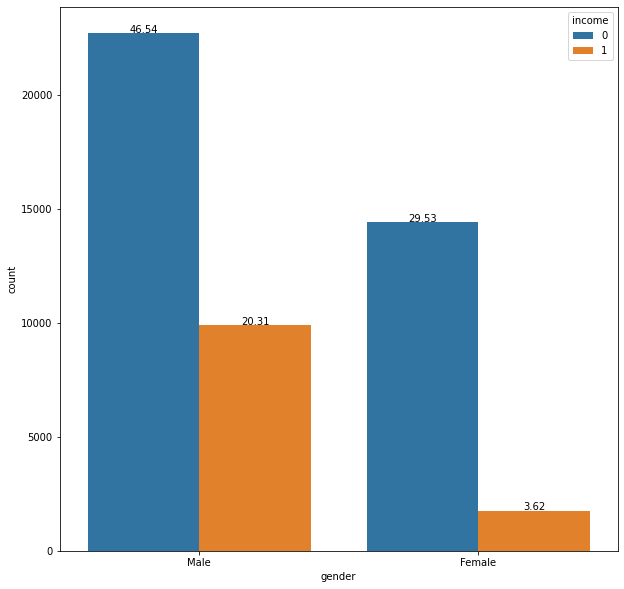

In [209]:
plt.figure(figsize=(10,10))
total = float(len(data) )

ax = sns.countplot(x="gender", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     For "female" earning more than 50k is rare with only 3.62% of all observations.
*     But for male, 20.31% of all people earn more than 50k .

### Hypothesis test (to test the relationship between Income & Gender ) 

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between gender and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between gender and income.

In [210]:
# contingency table
c_t = pd.crosstab(data['gender'].sample(frac=0.002, replace=True, random_state=1),
                  data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
print(c_t)
print('----------')
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

if p <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

income   0   1
gender        
Female  24   4
Male    47  23
----------
dof=1
p_value 0.10767430811439983
[[20.28571429  7.71428571]
 [50.71428571 19.28571429]]
probability=0.950, critical=3.841, stat=2.588
Independent (fail to reject H0)
we accept null hypothesis


### Conclusion
With the help of Chi-Squared test,

    As we have accept the H0, that there is no relationship between these two categorical variable.
    We can conclude that is no dependency of "gender" attribute on the target variable "income"

## 	Some multivariate relationships

###  Correlation among the numeric variables.

In [211]:
data_num = data.select_dtypes(include=np.number).drop(['educational-num', 'income'], axis=1)
data_num

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,25,226802,0,0,40
1,38,89814,0,0,50
2,28,336951,0,0,40
3,44,160323,7688,0,40
4,18,103497,0,0,30
...,...,...,...,...,...
48837,27,257302,0,0,38
48838,40,154374,0,0,40
48839,58,151910,0,0,40
48840,22,201490,0,0,20


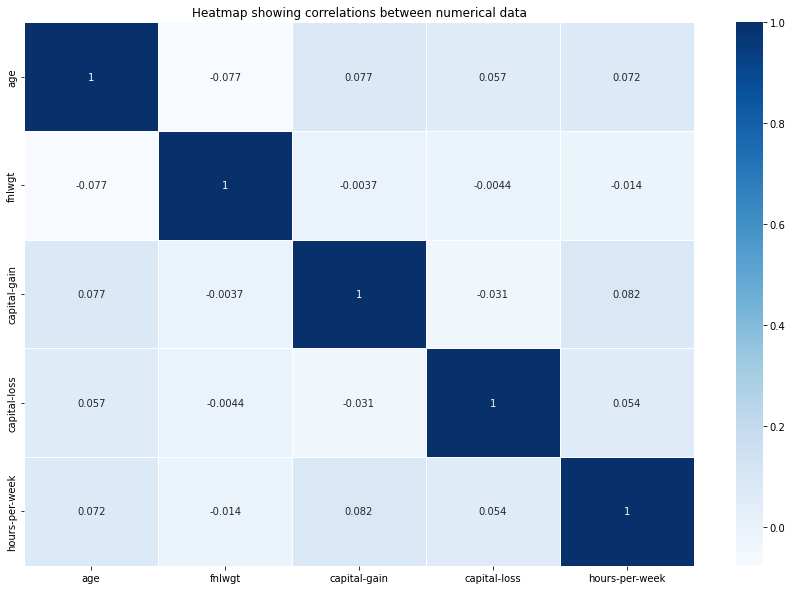

In [212]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

* There is no strong correlation among the numeric attributes.
* There is neither strong positive nor strong negative correlation present in any variable .
* The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.(which is less than 0.1, it means that very small correlation among them).


### Multivariate Analysis between "income", "hours-per-week", "gender"

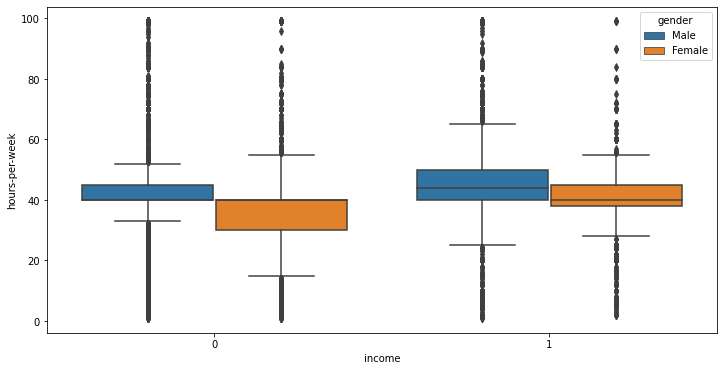

In [213]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=data)
plt.show()

* The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
* Boxplot range for Income group who earns <=50k [minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)] i.e.
  * Male ~[32,52]
  * Female ~[17,57]
  
> **Interpretation**

     Females have more flexible working hours per week in the income groups who earns <=50k
* Boxplot range for Income group who earns >50k [minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)] i.e.
  * Male ~[23,63]
  * Female ~[30,57]
  
> **Interpretation**
 
     Males have more flexible working hours per week in the income groups who earns <=50k

###  Multivariate analysis between "income", "age", "gender"

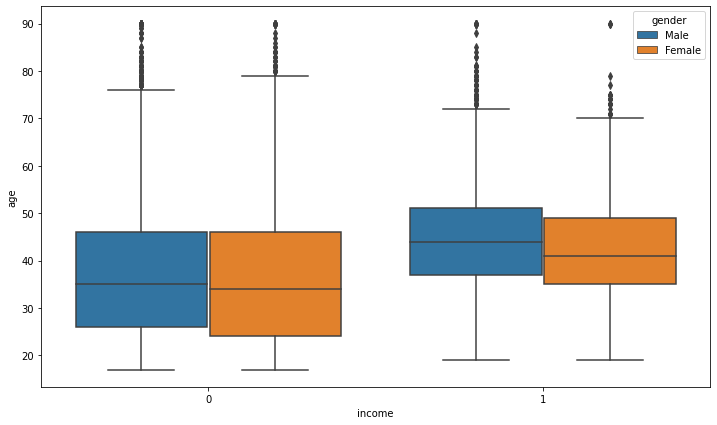

In [214]:
plt.figure(figsize=(12,7))
sns.boxplot(x="income", y="age",hue="gender",data=data)
plt.show()

Multivariate analysis between "income", "age", "gender" shows that:
*   Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k.
*   But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.


### Other Mutlivariate analysis 

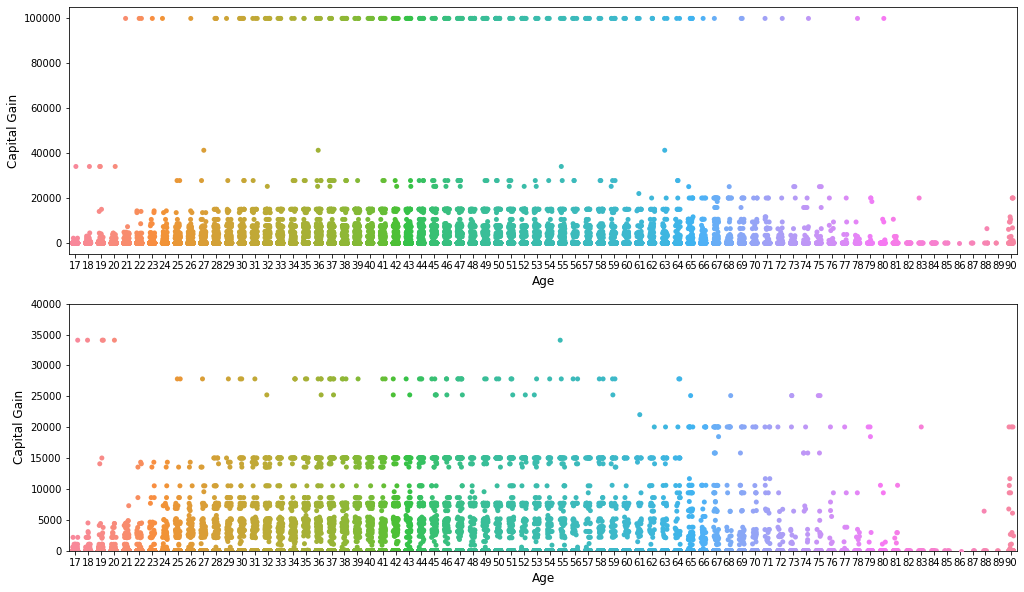

In [216]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

> **Explanation:**
*     Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90
*     Age 90 doesn't follow the pattern.
*     Capital.gain of 99999 is clearly a outlier .

In [217]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']

for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
Private             43
Self-emp-not-inc     5
Local-gov            5
Federal-gov          2
Name: workclass, dtype: int64
=======================================occupation=========================
Prof-specialty       16
Exec-managerial       9
Other-service         7
Adm-clerical          6
Craft-repair          5
Sales                 4
Machine-op-inspct     3
Transport-moving      2
Handlers-cleaners     1
Farming-fishing       1
Protective-serv       1
Name: occupation, dtype: int64


**At age 90 people can't work in goverment or private sectors. But there are some observations present in our dataset which shows that despite the age of 90 years they work in those sectors.**


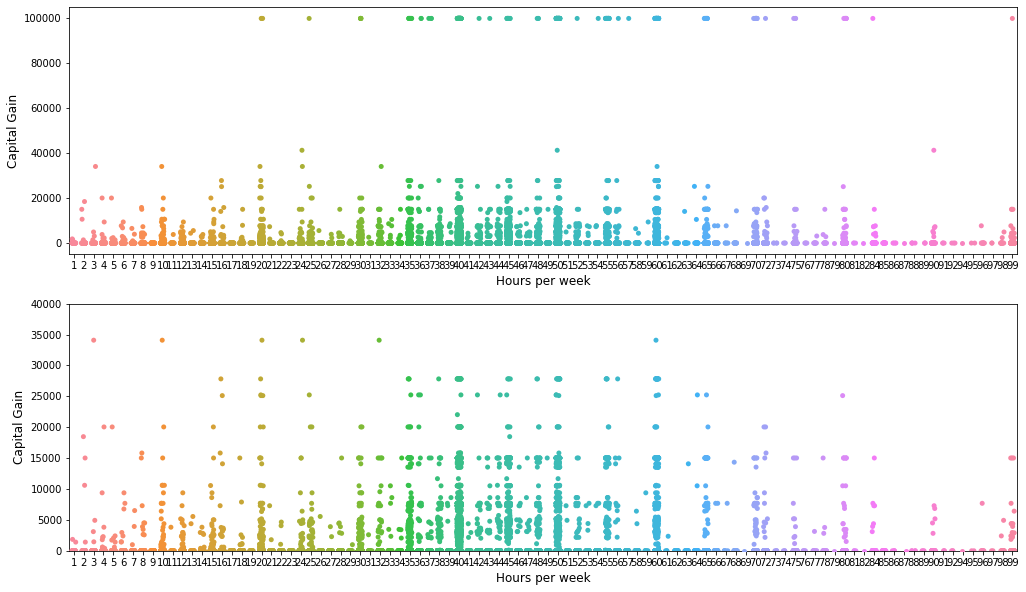

In [218]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours-per-week', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours-per-week', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

> **Explanation:**
*   Majority of people can be seen working for 40,50 and 60 hours per week and capital gain seems to be increasing.
*   There are few people working for 99 hours per week but doesn't seem to make high capital gain. Conversely people working below 40 hours per week are making high capital gains.

In [219]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['hours-per-week'] == 99][col].value_counts())
    else:
        continue

=======================================workclass=========================
Private             74
Self-emp-not-inc    36
Self-emp-inc        15
Local-gov            7
State-gov            3
Federal-gov          2
Name: workclass, dtype: int64
=======================================occupation=========================
Prof-specialty       36
Farming-fishing      20
Transport-moving     19
Exec-managerial      18
Other-service        15
Craft-repair         10
Sales                 6
Protective-serv       4
Priv-house-serv       4
Adm-clerical          2
Tech-support          2
Handlers-cleaners     1
Name: occupation, dtype: int64


## Making new variable(capital_change)

###  Summary statistics

In [220]:
data["capital_change"] = data["capital-gain"] - data["capital-loss"]
data["capital_change"].describe()

count    48842.000000
mean       991.565313
std       7475.549906
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_change, dtype: float64

### Distribution

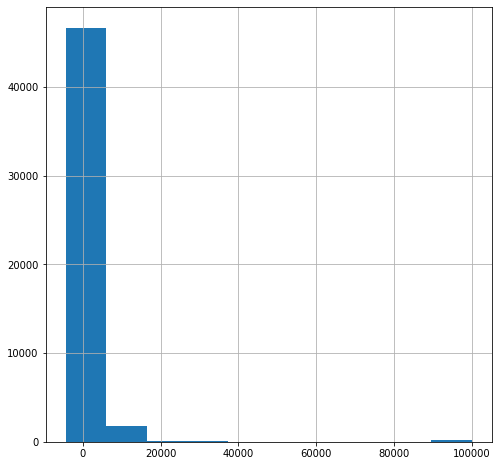

In [221]:
data["capital_change"].hist(figsize=(8,8))
plt.show()

###  Description about summary & Distribution

The summary statistics and distribution of **capital_change** shows that:
* It is similar summary stats and distribution to the capital gain and capital loss.
* This suggest that , we may replace these two features with one feature called **capital_change**

##  Conclusion of Complete EDA

Feature Removal:

    1. Education num and education are giving similar information.
    2. Using capital-gain and capital loss , we can make new variable called capital-change.


Outliers Summary:

    1. Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
    2. Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is rare.



Other conclusion:

    1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).
    
    2. Females have more flexible working hours per week in the income groups who earns <=50k.
    
    3. Males have more flexible working hours per week in the income groups who earns >50k.
    
    4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.
    
    5. Generally people can be seen working for 30 hours to 40 hours per week. 
    
    6. Income group who earns >50k have flexible working hours.
    
    7. For "female" earning more than 50k is rare with only 3.62% of all observations.
       But for male, 20.31% of all people earn more than 50k .
       
    8. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
    
    9. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).
  
Attributes affecting the target feature:
    
    Age 
    Hours per week
    capital-change
    workclass
    Education
    marital-status
    occupation
    relationship
    race
    gender
    native-country


useful vdo - 
https://www.youtube.com/watch?v=4-rxTA_5_xA&t=539s (test)
https://www.youtube.com/watch?v=w5iKu1IrTJQ (chi-square)

In [3]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')